In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import signal

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [2]:
plot_directory = '/home/flanigan/temp/'

In [3]:
npd = npy.NumpyDirectory('/data/readout/2017-11-25_125608_scan.npd/')

In [4]:
npd.node_names()

['Scan0',
 'ADCSnap1',
 'ADCSnap2',
 'ADCSnap3',
 'ADCSnap4',
 'ADCSnap5',
 'ADCSnap6',
 'ADCSnap7',
 'ADCSnap8',
 'ADCSnap9',
 'ADCSnap10',
 'ADCSnap11',
 'ADCSnap12',
 'ADCSnap13',
 'ADCSnap14',
 'ADCSnap15',
 'ADCSnap16',
 'ADCSnap17',
 'ADCSnap18',
 'ADCSnap19',
 'ADCSnap20',
 'ADCSnap21',
 'ADCSnap22',
 'ADCSnap23',
 'ADCSnap24',
 'ADCSnap25',
 'ADCSnap26',
 'ADCSnap27',
 'ADCSnap28',
 'ADCSnap29',
 'ADCSnap30',
 'ADCSnap31',
 'ADCSnap32',
 'ADCSnap33',
 'ADCSnap34',
 'ADCSnap35',
 'ADCSnap36',
 'ADCSnap37',
 'ADCSnap38',
 'ADCSnap39',
 'ADCSnap40',
 'ADCSnap41',
 'ADCSnap42',
 'ADCSnap43',
 'ADCSnap44',
 'ADCSnap45',
 'ADCSnap46',
 'ADCSnap47',
 'ADCSnap48',
 'ADCSnap49',
 'ADCSnap50',
 'ADCSnap51',
 'ADCSnap52',
 'ADCSnap53',
 'ADCSnap54',
 'ADCSnap55',
 'ADCSnap56',
 'ADCSnap57',
 'ADCSnap58',
 'ADCSnap59',
 'ADCSnap60',
 'ADCSnap61',
 'ADCSnap62',
 'ADCSnap63',
 'ADCSnap64',
 'ADCSnap65',
 'ADCSnap66',
 'ADCSnap67',
 'ADCSnap68',
 'ADCSnap69',
 'ADCSnap70',
 'ADCSnap71',
 'ADC

# ADCSnap

In [5]:
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(420.0, 446.0),
 (350.0, 372.0),
 (336.0, 350.0),
 (342.0, 383.0),
 (379.0, 412.0),
 (363.0, 398.0),
 (323.0, 349.0),
 (311.0, 375.0),
 (295.0, 351.0),
 (303.0, 355.0),
 (345.0, 382.0),
 (367.0, 438.0),
 (429.0, 462.0),
 (416.0, 418.0),
 (409.0, 384.0),
 (361.0, 352.0),
 (441.0, 423.0),
 (448.0, 457.0),
 (433.0, 421.0),
 (407.0, 366.0),
 (369.0, 353.0),
 (405.0, 379.0),
 (410.0, 379.0),
 (427.0, 410.0),
 (389.0, 366.0),
 (378.0, 377.0),
 (417.0, 391.0),
 (355.0, 364.0),
 (356.0, 374.0),
 (278.0, 272.0),
 (334.0, 316.0),
 (309.0, 293.0),
 (341.0, 326.0),
 (300.0, 295.0),
 (308.0, 306.0),
 (349.0, 354.0),
 (284.0, 292.0),
 (282.0, 283.0),
 (275.0, 254.0),
 (225.0, 228.0),
 (239.0, 254.0),
 (262.0, 246.0),
 (249.0, 249.0),
 (251.0, 289.0),
 (234.0, 240.0),
 (267.0, 263.0),
 (289.0, 292.0),
 (302.0, 313.0),
 (248.0, 251.0),
 (275.0, 302.0),
 (261.0, 282.0),
 (284.0, 300.0),
 (324.0, 345.0),
 (297.0, 304.0),
 (247.0, 255.0),
 (289.0, 293.0),
 (309.0, 302.0),
 (299.0, 283.0),
 (328.0, 310.0

In [7]:
[(snap.x.std(), snap.y.std()) for snap in snaps]

[(55.043525500774777, 57.384164426808098),
 (55.056222892886204, 57.925476355357681),
 (55.476790857053238, 58.800551006353174),
 (55.309415877831626, 59.386015580931158),
 (54.772307401552062, 59.131230788131511),
 (53.172666009651607, 58.427784614981327),
 (51.135182538924113, 57.158895722270891),
 (49.329840518191745, 56.21315646374623),
 (47.625535650945551, 55.203430433532375),
 (47.149785896874015, 55.000413181638613),
 (50.253668147685751, 57.575430760178065),
 (53.623325026080266, 59.684075645260499),
 (56.927351288428056, 60.971287252715591),
 (59.888051419853618, 61.830436796360345),
 (61.744650990843283, 61.878683776243626),
 (62.17497223077698, 60.807802430539319),
 (61.399913373052733, 59.593683329776461),
 (61.908142499481528, 59.65233459732378),
 (60.935016369702801, 58.375712713019929),
 (60.233735813158432, 57.553130261721869),
 (61.084619722302044, 58.416083098000833),
 (59.375015214115002, 56.93902357587978),
 (58.136740812853517, 55.68740252979709),
 (57.26943355401

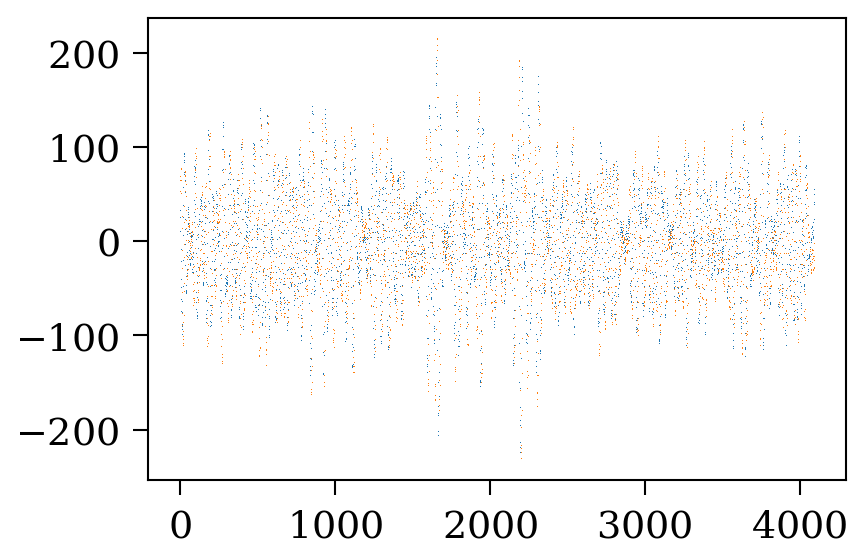

In [8]:
fig, ax = plt.subplots()
ax.plot(snaps[0].x, ',')
ax.plot(snaps[0].y, ',')

# Scan

In [9]:
scan = npd.Scan0
frequency, amplitude, smoothed = scan.stitch()

In [13]:
sa = scan.sweep_arrays[0]

In [14]:
sa.stream_arrays[0].roach_state

StateDict({u'boffile': u'r2iq2xpfb14mcr18gb_2016_Jun_30_1104.bof', u'modulation_output': 0, u'modulation_rate': 0, u'fft_shift_register': 1048064, u'num_tone_samples': 32768, u'bank': 0, u'num_filterbank_channels': 16384, u'loopback': False, u'lo_frequency': 1490000000.0, u'adc_sample_rate': 512000000.0, u'waveform_normalization': 0.0015869140625, u'hardware_delay_samples': -16025.6, u'num_tones': 128, u'debug_register': 0, u'reference_sequence_number': 2324558592, u'dac_attenuation': 0.0, u'heterodyne': True})

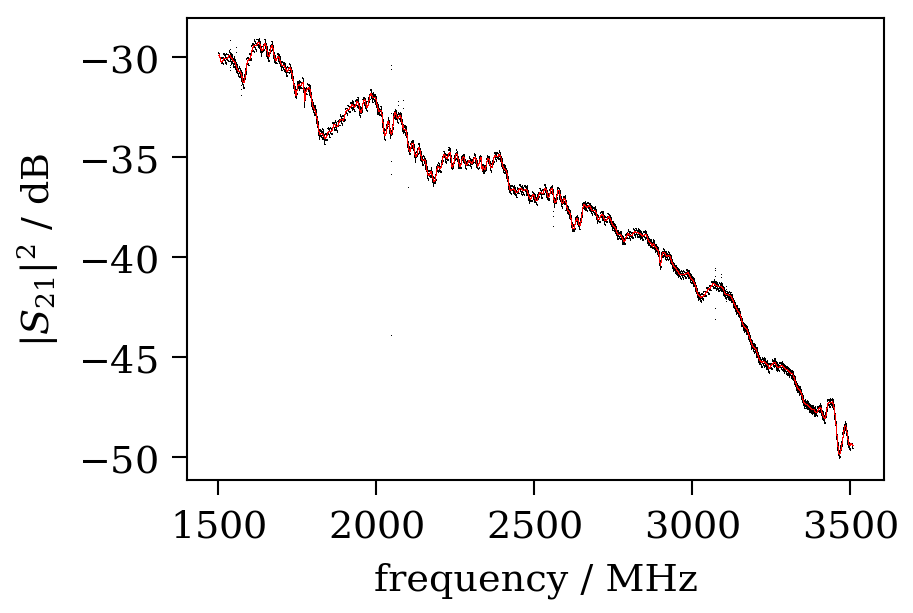

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
for sa in scan.sweep_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
ax.plot(1e-6 * frequency, 20 * np.log10(smoothed), ',r')


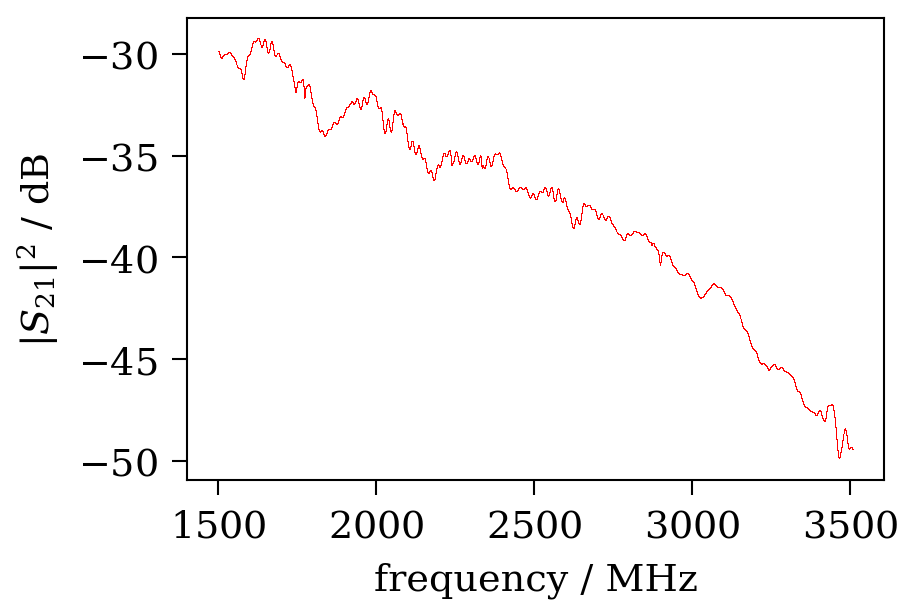

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
ax.plot(1e-6 * frequency, 20 * np.log10(smoothed), ',r')
